# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [108]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

In [117]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

responses = []
query_url = f"{base_url}appid={weather_api_key}&q="

# Get weather data
print("Beginning Data Retrieval")
print("---------------------------------")

city_counter = 1
set_counter = 1

for i, city in enumerate(cities):
    if (i%50 == 0 and i>= 50):
        set_counter += 1
        city_counter = 0
         
    print("Processing Record %s of Set %s | %s" % (city_counter, set_counter, city)) 
    city_counter += 1
       
    try:
        response = requests.get(query_url + city + "&units=imperial").json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        dates = response["dt"]
        country = response["sys"]["country"]
        
        responses.append({"City": city, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity":humidity,
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Date":dates, "Country":country})
               
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | kyshtovka
Processing Record 6 of Set 1 | mackay
Processing Record 7 of Set 1 | batsfjord
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | amvrosiyivka
Processing Record 10 of Set 1 | ambilobe
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | bani walid
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | hofn
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | biak
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | ter

Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | saint-augustin
Processing Record 41 of Set 4 | arvin
Processing Record 42 of Set 4 | natal
Processing Record 43 of Set 4 | borazjan
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | laguna
Processing Record 46 of Set 4 | quatre cocos
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | toliary
City not found. Skipping...
Processing Record 49 of Set 4 | norman wells
Processing Record 0 of Set 5 | hervey bay
Processing Record 1 of Set 5 | palu
Processing Record 2 of Set 5 | gulshat
City not found. Skipping...
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | saleilua
City not found. Skipping...
Processing Record 5 of Set 5 | izhma
Processing Record 6 of Set 5 | camalu
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | povolzhskiy
Processing Record 9 of Set 5 | tamandare
Processing Record 10 of Se

City not found. Skipping...
Processing Record 30 of Set 8 | srednekolymsk
Processing Record 31 of Set 8 | yeppoon
Processing Record 32 of Set 8 | santa lucia
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | upernavik
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | klamath falls
Processing Record 37 of Set 8 | taoudenni
Processing Record 38 of Set 8 | maragogi
Processing Record 39 of Set 8 | vitim
Processing Record 40 of Set 8 | beloha
Processing Record 41 of Set 8 | roswell
Processing Record 42 of Set 8 | solnechnyy
Processing Record 43 of Set 8 | pudozh
Processing Record 44 of Set 8 | north bend
Processing Record 45 of Set 8 | youghal
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | verkhnyaya toyma
Processing Record 48 of Set 8 | huntsville
Processing Record 49 of Set 8 | kajaani
Processing Record 0 of Set 9 | salinas
Processing Record 1 of Set 9 | camacupa
Processing Record 2 of Set 9 | nieves
Processing R

Processing Record 20 of Set 12 | lata
Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | turangi
Processing Record 23 of Set 12 | abu dhabi
Processing Record 24 of Set 12 | saint anthony
Processing Record 25 of Set 12 | palafrugell
Processing Record 26 of Set 12 | armacao dos buzios
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
cities_df = pd.DataFrame(responses, columns=["City","Lat","Lng","Max Temp","Humidity",
                                             "Cloudiness","Wind Speed","Date","Country"])
cities_df.to_csv('output.csv', index=True)


In [119]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,bredasdorp,-34.5322,20.0403,52.18,58,11,5.14,1627347182,ZA
1,tasiilaq,65.6145,-37.6368,35.71,88,26,4.12,1627347182,GL
2,hilo,19.7297,-155.0900,78.53,89,90,9.22,1627347093,US
3,hobart,-42.8794,147.3294,57.11,76,75,1.99,1627346990,AU
4,kyshtovka,56.5550,76.6271,52.77,76,95,6.22,1627347182,RU


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [120]:
cities_df['Humidity'].describe()

count    535.000000
mean      70.844860
std       20.121174
min        8.000000
25%       61.000000
50%       76.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [116]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

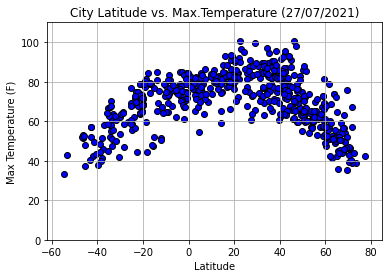

In [125]:
x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max.Temperature (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("lat_temp_plot.png")


## Latitude vs. Humidity Plot

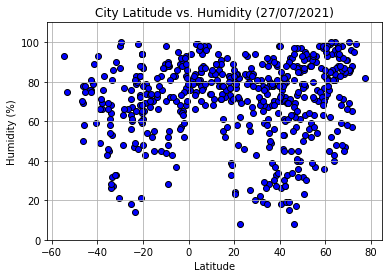

In [126]:
x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("lat_humidity.png")

## Latitude vs. Cloudiness Plot

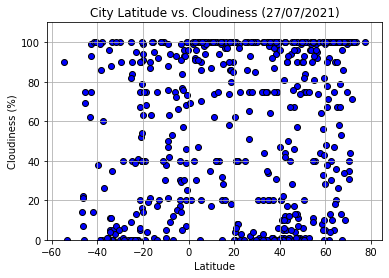

In [127]:
x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

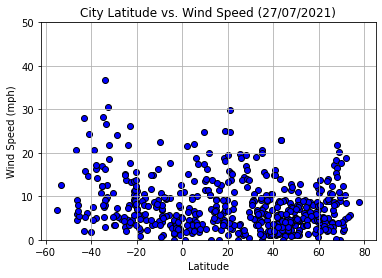

In [129]:
x_axis = cities_df['Lat']
y_axis = cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("lat_windspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


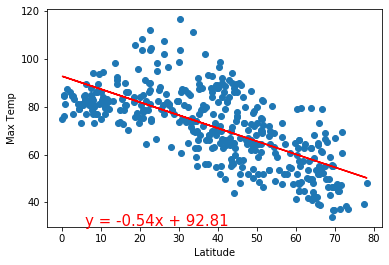

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


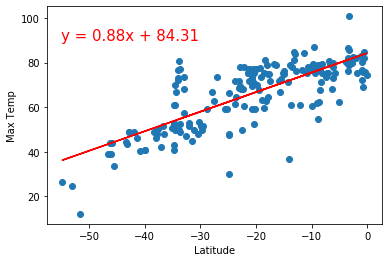

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


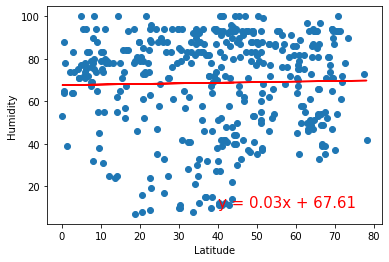

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


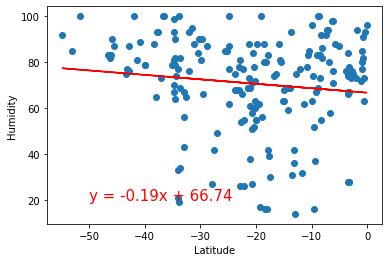

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


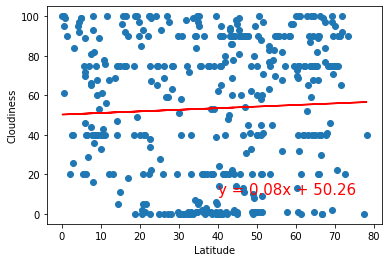

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


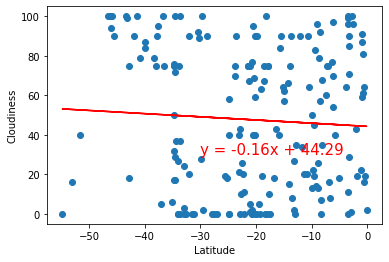

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


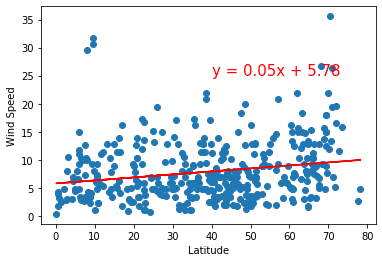

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


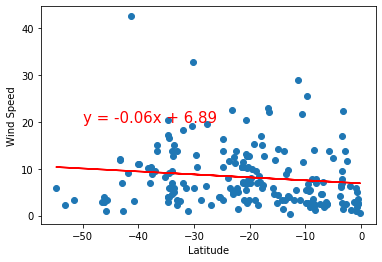